<a href="https://colab.research.google.com/github/arghac14/CropYield-prediction/blob/master/CropPrediction(single_district).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating Dataset(Bangalore District)

In [80]:
Bangalore_data={
    'Year':[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002],
    'Precipitation':[698.485,996.754,819.437,933.128,602.847,941.275,1081.408,1091.201,1218.563,922.834,1000.767,731.834,748.194],
    'Min_Temp':[24.706,24.771,24.561,24.987,24.642,24.901,24.862,25.139,25.434,24.79,24.759,25.148,25.263],
    'Cloud_Cover':[48.424,48.394,48.394,48.394,48.394,48.394,50.766,80.049,50.213,48.408,49.684,52.792,49.134],
    'Vapour_pressure':[21.208,21.37,21.085,21.193,21.191,21.488,21.311,21.435,21.766,21.108,21.265,21.484,21.56],
    'Area':[18057,18070,18079,18051,17609,18050,17802,18042,17650,18123,17890,18090,18790],
    'Production':[16072,20353,20847,18124,22822,15432,21371,18076,19870,17652,18562,19087,20981]
}
df1=pd.DataFrame(Bangalore_data)
df1=df1.drop(7).reset_index()
df1

,index,Year,Precipitation,Min_Temp,Cloud_Cover,Vapour_pressure,Area,Production
0,0,1990,698.485,24.706,48.424,21.208,18057,16072
1,1,1991,996.754,24.771,48.394,21.370,18070,20353
2,2,1992,819.437,24.561,48.394,21.085,18079,20847
3,3,1993,933.128,24.987,48.394,21.193,18051,18124
4,4,1994,602.847,24.642,48.394,21.191,17609,22822
5,5,1995,941.275,24.901,48.394,21.488,18050,15432
6,6,1996,1081.408,24.862,50.766,21.311,17802,21371
7,8,1998,1218.563,25.434,50.213,21.766,17650,19870
8,9,1999,922.834,24.790,48.408,21.108,18123,17652
9,10,2000,1000.767,24.759,49.684,21.265,17890,18562


### Showing correlation between dependent and independent variables

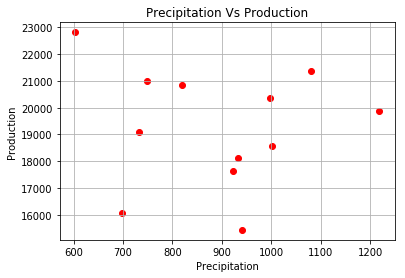

In [81]:
plt.scatter(df1['Precipitation'],df1['Production'],color='red')
plt.title("Precipitation Vs Production")
plt.xlabel("Precipitation")
plt.ylabel("Production")
plt.grid()
plt.show()

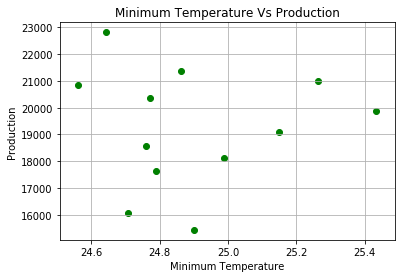

In [82]:
plt.scatter(df1['Min_Temp'],df1['Production'],color='green')
plt.title("Minimum Temperature Vs Production")
plt.xlabel("Minimum Temperature")
plt.ylabel("Production")
plt.grid()
plt.show()

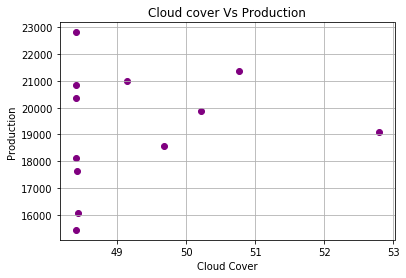

In [83]:
plt.scatter(df1['Cloud_Cover'],df1['Production'],color="purple")
plt.title("Cloud cover Vs Production")
plt.xlabel("Cloud Cover")
plt.ylabel("Production")
plt.grid()
plt.show()

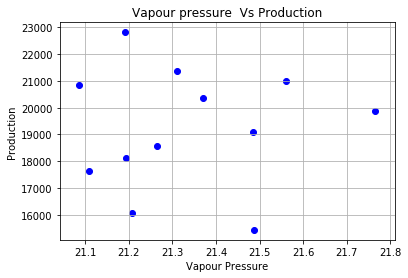

In [84]:
plt.scatter(df1['Vapour_pressure'],df1['Production'],color='blue')
plt.title("Vapour pressure  Vs Production")
plt.xlabel("Vapour Pressure")
plt.ylabel("Production")
plt.grid()
plt.show()

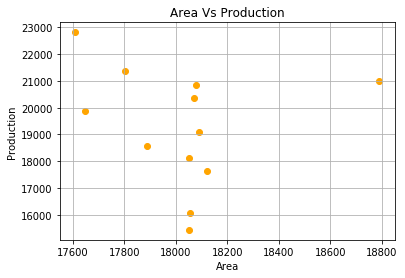

In [85]:
plt.scatter(df1['Area'],df1['Production'],color='orange')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

## Regression :

In [0]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [87]:

X = df1[['Precipitation'	,'Min_Temp'	,'Cloud_Cover'	,'Vapour_pressure'	,'Area']] 
Y = df1['Production']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')

Predicted Production: [17106.7510439  17716.54241586 10252.45389812] 


Coefficients:  [   14.21399777 -1573.19538251  1127.23739376 -1167.21079672
     7.49900893] 


R-squared score:  -14.46870807799485 



### Regression (Predicting Production for each year without taking that year as training data) :

In [88]:
error=[]
year=1990
for i in range(0,12):
  
  X = df1[['Precipitation'	,'Min_Temp'	,'Cloud_Cover'	,'Vapour_pressure'	,'Area']] .drop(i)
  Y = df1['Production'].drop(i)

  x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
  reg=linear_model.LinearRegression()
  reg.fit(x_train,y_train)

  y_pred=reg.predict([df1.loc[i,'Precipitation':'Area']])
  print('~ Year:',year,'-\n','Predicted Production:',y_pred,', ','Actual Production:',[df1.loc[i,'Production']],', ','Error: ',y_pred-df1.loc[i,'Production'])
  error.append(float(y_pred-df1.loc[i,'Production']))
  year+=1

~ Year: 1990 -
 Predicted Production: [18714.27954339] ,  Actual Production: [16072] ,  Error:  [2642.27954339]
~ Year: 1991 -
 Predicted Production: [21702.40152038] ,  Actual Production: [20353] ,  Error:  [1349.40152038]
~ Year: 1992 -
 Predicted Production: [17545.3232153] ,  Actual Production: [20847] ,  Error:  [-3301.6767847]
~ Year: 1993 -
 Predicted Production: [16592.48236284] ,  Actual Production: [18124] ,  Error:  [-1531.51763716]
~ Year: 1994 -
 Predicted Production: [11642.61488946] ,  Actual Production: [22822] ,  Error:  [-11179.38511054]
~ Year: 1995 -
 Predicted Production: [19377.79578057] ,  Actual Production: [15432] ,  Error:  [3945.79578057]
~ Year: 1996 -
 Predicted Production: [20013.1406994] ,  Actual Production: [21371] ,  Error:  [-1357.8593006]
~ Year: 1997 -
 Predicted Production: [4734.21994571] ,  Actual Production: [19870] ,  Error:  [-15135.78005429]
~ Year: 1998 -
 Predicted Production: [21828.21258611] ,  Actual Production: [17652] ,  Error:  [4176.

#### Error:

In [89]:
import math
print(list(error))

total_error=0
for i in error:
  total_error=total_error+(i*i)
  
mean_squared_error=math.sqrt(total_error)/13

print("\nMean Squared Error: ",mean_squared_error)

[2642.2795433902647, 1349.4015203840972, -3301.676784695592, -1531.5176371566777, -11179.385110542527, 3945.7957805672195, -1357.8593005988223, -15135.78005429398, 4176.212586108479, 883.6827505683759, 3064.3187068111147, -4509.509902252474]

Mean Squared Error:  1616.2636664982322
